# 1. Importing packages

In [60]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# what is %matplotlib inline: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline
import seaborn as sns

# 2. Load the dataset

In [61]:
tweets_df = pd.read_csv('cleaned_tsla_tweets.csv')
tweets_df = tweets_df.iloc[:, [0,1,4]]
tweets_df.head()

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful


In [62]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             113741 non-null  int64 
 1   date           113741 non-null  object
 2   cleaned_tweet  109112 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [63]:
#Change date column into datetime type
tweets_df.date=pd.to_datetime(tweets_df.date)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             113741 non-null  int64         
 1   date           113741 non-null  datetime64[ns]
 2   cleaned_tweet  109112 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ MB


In [64]:
# check for null values
# https://www.miamioh.edu/cads/students/coding-tutorials/python/data-cleaning/index.html
tweets_df.isnull().sum()

id                  0
date                0
cleaned_tweet    4629
dtype: int64

In [65]:
# delete the null values
tweets_df = tweets_df.dropna()

# 3. Calculating the sentiment scores

In [66]:
# use TextBlob for sentiment scores:
tweets_df['sentiment_score'] = tweets_df.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets_df.head()

,id,date,cleaned_tweet,sentiment_score
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude,0.15
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol,0.20
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful,0.75


# 4. Previewing sentiment scores of tweets

In [67]:
tweets_df.cleaned_tweet[174]

'wow hold delivery last day make look like big demand  '

In [68]:
tweets_df.sentiment_score[174]

0.03333333333333333

In [69]:
# https://pandas.pydata.org/docs/user_guide/options.html
pd.options.display.max_colwidth = 250
random_subset = tweets_df.sample(n=15)
# remove columns
random_subset = random_subset.drop(columns=['id','date'])
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet', 
                                              'cleaned_tweet': 'Cleaned Tweet', 
                                              'sentiment_score':'Sentiment Score'})

random_subset.head(5)

,Cleaned Tweet,Sentiment Score
27952,get eye lowball bid jan googl call sep mgm call jan put jan twtr call jan uaa call bb rock happens get stopped pin call within minute buy jiffy,0.000
35559,top momentum stock ytd nflx amzn nvda fb,0.500
36248,stock make big move hour keurig dr pepper f network kdp ffiv ba cv,0.000
93299,kevin holloway really show much two capable focused part time gig yes good read amzn investor,0.325
53134,swing call next week,0.000


# 5. Frequency analysis of sentiment scores

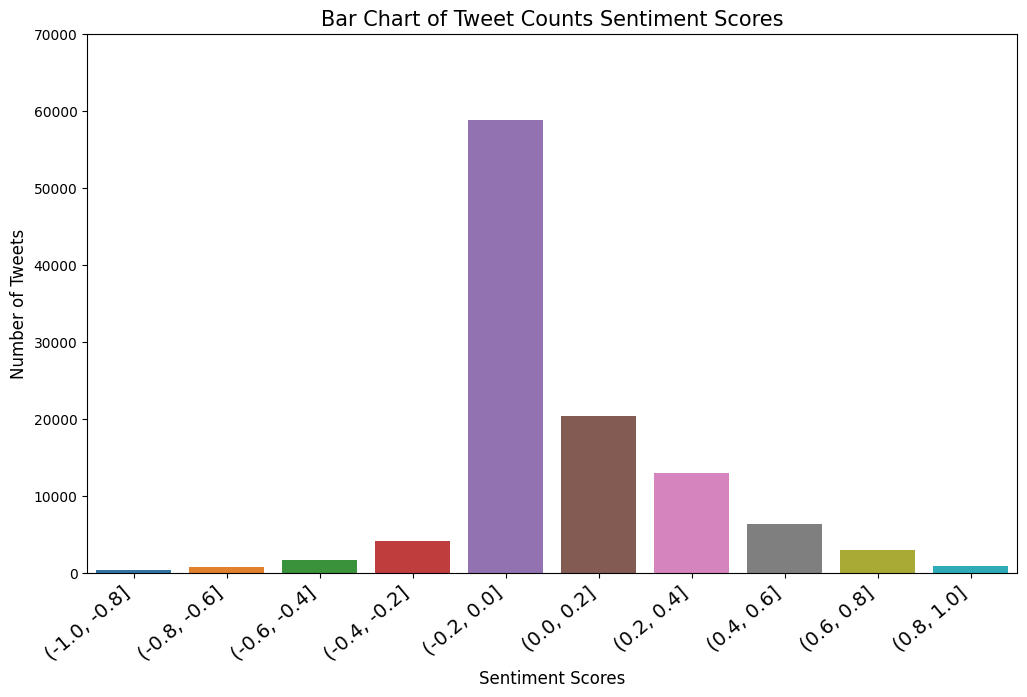

In [70]:
# plotting counts of tweets for binned sentiment scores
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)
plt.figure(figsize=(12,7))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('Sentiment Scores', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)
ax.set_title('Bar Chart of Tweet Counts Sentiment Scores' , fontsize=15)
ax.set_ylim(0, 70000)
plt.show()

# 6. Caluculate the average sentiment scores each day

In [82]:
daily_sentiment_scores_df = tweets_df[['date', 'sentiment_score']]
daily_sentiment_scores_df.head()

,date,sentiment_score
0,2020-01-02,0.15
1,2020-01-02,-0.20
2,2020-01-02,0.20
3,2020-01-02,0.00
4,2020-01-02,0.75


In [83]:
#daily_sentiment_scores_df.sentiment_score[1000]

In [84]:
# average sentiment scores of each day
daily_sentiment_scores_df = daily_sentiment_scores_df.resample('D', on='date').mean()
daily_sentiment_scores_df.head()

,sentiment_score
date,
2020-01-01,0.099938
2020-01-02,0.111398
2020-01-03,0.073760
2020-01-04,0.083606
2020-01-05,0.086658


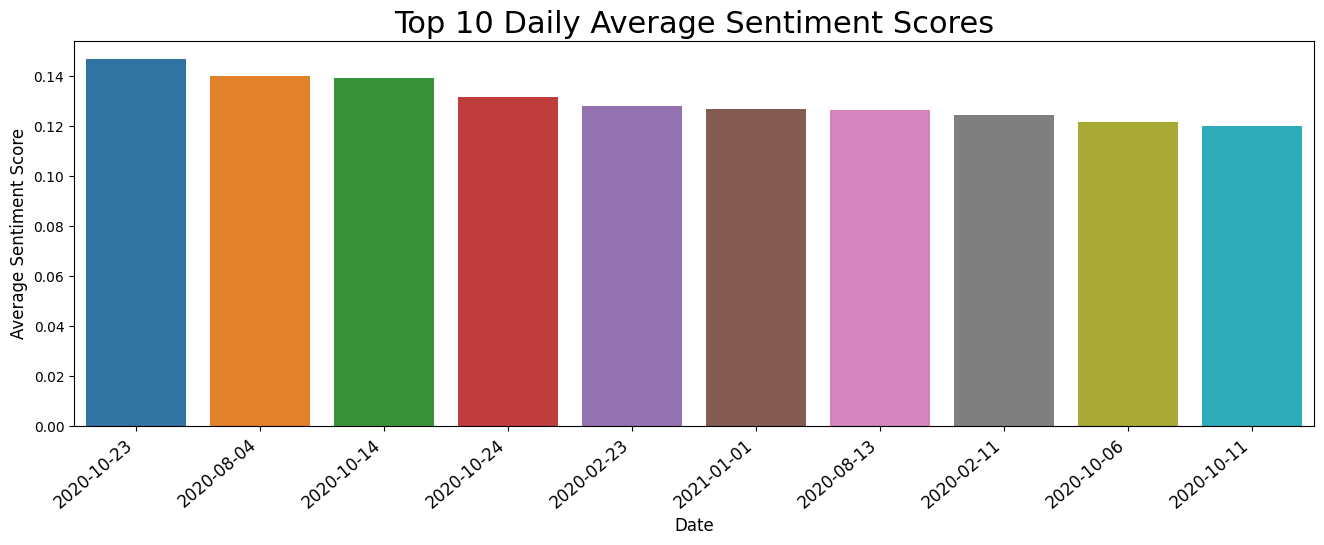

In [74]:
# Plot top 10 daily sentiment score averages
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Top 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

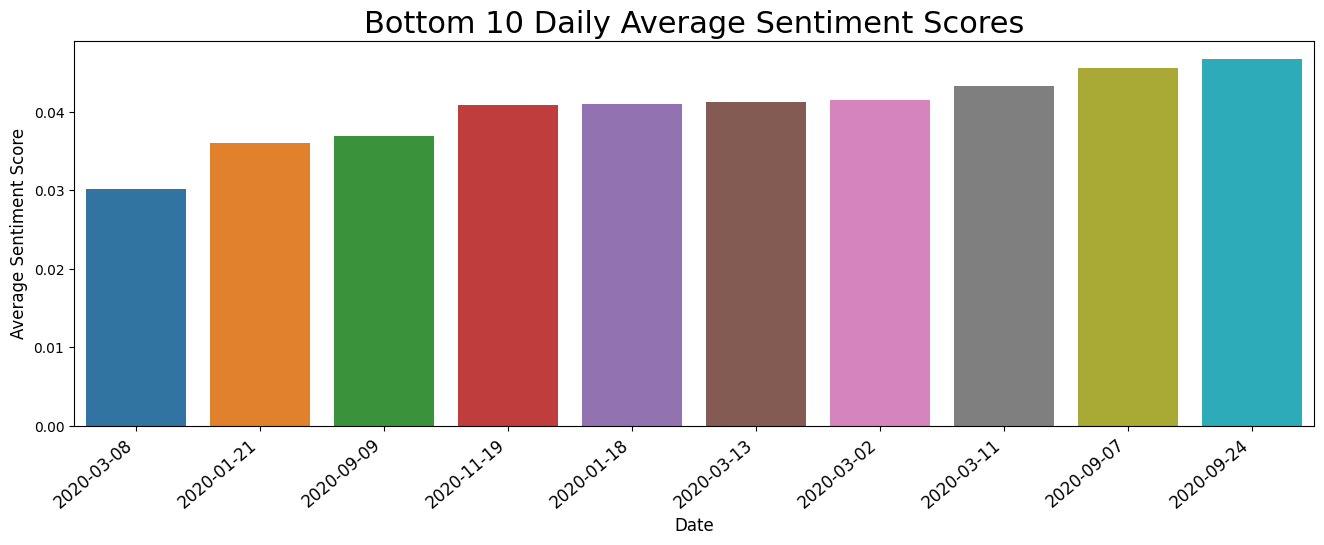

In [75]:
# plot bottom 10 daily sentiment score averages
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Bottom 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

# 7. Removing sentiment scores consisting zero

In [76]:
tweets_df.head()

,id,date,cleaned_tweet,sentiment_score,bin
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude,0.15,"(0.0, 0.2]"
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20,"(-0.4, -0.2]"
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol,0.20,"(0.0, 0.2]"
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00,"(-0.2, 0.0]"
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful,0.75,"(0.6, 0.8]"


In [85]:
# make new copy of df for df that doesn't have zero scores
tweets_dfnullzero = tweets_df.copy()
tweets_dfnullzero.head()

,id,date,cleaned_tweet,sentiment_score,bin
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude,0.15,"(0.0, 0.2]"
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20,"(-0.4, -0.2]"
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol,0.20,"(0.0, 0.2]"
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00,"(-0.2, 0.0]"
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful,0.75,"(0.6, 0.8]"


In [86]:
# check amount of tweets with zeros
(tweets_dfnullzero.sentiment_score == 0).sum()

48917

In [87]:
# remove them
#tweets_dfnullzero.sentiment_score !=0
tweets_dfnullzero = tweets_dfnullzero[tweets_dfnullzero.sentiment_score !=0 ]
(tweets_dfnullzero.sentiment_score == 0).sum()

0

In [93]:
# Only take the date and sentiment score columns
tweets_dfnullzero = tweets_dfnullzero[['date','sentiment_score']]
tweets_dfnullzero.head()

,date,sentiment_score
0,2020-01-01,0.154961
1,2020-01-02,0.161528
2,2020-01-03,0.128297
3,2020-01-04,0.144796
4,2020-01-05,0.132267


In [94]:
# preview daily average w/o zero sentiment scores
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
tweets_dfnullzero = tweets_dfnullzero.groupby(['date'], as_index=False).mean()

In [95]:
tweets_dfnullzero.isnull().sum()

date               0
sentiment_score    0
dtype: int64

In [96]:
# adding final average sentiment scores
daily_sentiment_scores_df['sentiment_score_final'] = tweets_dfnullzero.sentiment_score.values
daily_sentiment_scores_df.head()

,sentiment_score,sentiment_score_final
date,,
2020-01-01,0.099938,0.154961
2020-01-02,0.111398,0.161528
2020-01-03,0.073760,0.128297
2020-01-04,0.083606,0.144796
2020-01-05,0.086658,0.132267


# 8. Save sentiment analysis results

In [97]:
daily_sentiment_scores_df.to_csv('daily_avg_sen_scores.csv')